In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.model_selection import cross_val_score

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [3]:
df = pd.read_csv('adult_train.csv',names=['age','workclass','fnlwgt','education','education_num',
                                          'marital_status','occupation','relationship','race','sex',
                                          'capital_gain','capital_loss','hours_per_week','native_country','Target'])

In [4]:
df.shape

(32561, 15)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
Target            0
dtype: int64

In [7]:
df.duplicated().sum()

24

In [8]:
df[df.select_dtypes(include=['object']).columns] = df[df.select_dtypes(include=['object']).columns].apply(lambda x: x.str.strip())
df.drop_duplicates(inplace=True)
df['Target'].replace(to_replace='<=50K',value='0',inplace=True)
df['Target'].replace(to_replace='>50K',value='1',inplace=True)
df['Target'] = df['Target'].astype(int)
df.replace(to_replace='?',value=np.NaN,inplace=True)
df.dropna(inplace=True)

In [9]:
dictionary_categorical ={}

In [10]:
def strip_df(df,cols) :
    df[cols] = df[cols].apply(lambda x: x.str.strip())

In [11]:
def clensing(df) :
    df.drop_duplicates(inplace=True)
    df['Target'].replace(to_replace='<=50K',value='0',inplace=True)
    df['Target'].replace(to_replace='>50K',value='1',inplace=True)
    df['Target'] = df['Target'].astype(int)
    df.replace(to_replace='?',value=np.NaN,inplace=True)
    df.dropna(inplace=True)

In [12]:
def dict_categorical(df,cols) :
    for i in cols :
        d = {}
        for j in range(0,len(df[i].unique())) :
            d[df[i].unique()[j]] = j+1
        dictionary_categorical[i] = d

In [13]:
def categorical_numerical(df,cols) :    
    for i in cols :
        for j in range(0,len(df[i].unique())) :
            if not str(df[i].unique()[j]) in dictionary_categorical[i].keys() :
                v = max(dictionary_categorical[i].values()) +1
                dictionary_categorical[i][df[i].unique()[j]] = v
                df.loc[df[i] == df[i].unique()[j], i] = v
            elif str(df[i].unique()[j]) in dictionary_categorical[i].keys() :
                dv = dictionary_categorical[i][df[i].unique()[j]]
                df.loc[df[i] == df[i].unique()[j], i] = dv

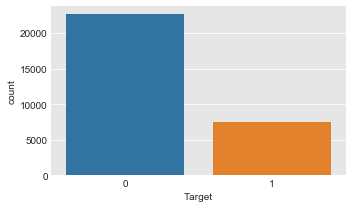

In [14]:
fig, ax = plt.subplots(figsize=(5,3))
ax = sns.countplot(x="Target", data=df)
plt.tight_layout()

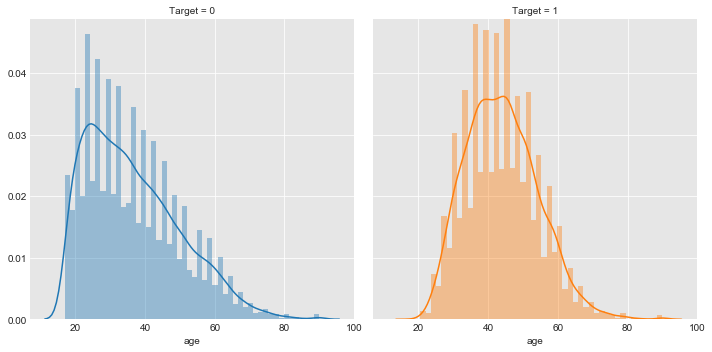

In [15]:
g = sns.FacetGrid(data=df,col='Target',size=5,hue='Target')
g.map(sns.distplot,'age')

In [16]:
def plotting_categorical(df,col,target,s):
    g = sns.FacetGrid(data=df,col=target,size=s,hue=target,)
    g.map(sns.countplot,col,order=df[col].value_counts().index)
    for ax in g.axes.flatten(): 
        for tick in ax.get_xticklabels(): 
            tick.set(rotation=90)

In [17]:
def plotting_numerical(df,col,target,s):
    g = sns.FacetGrid(data=df,col=target,size=5,hue=target)
    g.map(sns.distplot,col)
    for ax in g.axes.flatten(): 
        for tick in ax.get_xticklabels(): 
            tick.set(rotation=90)

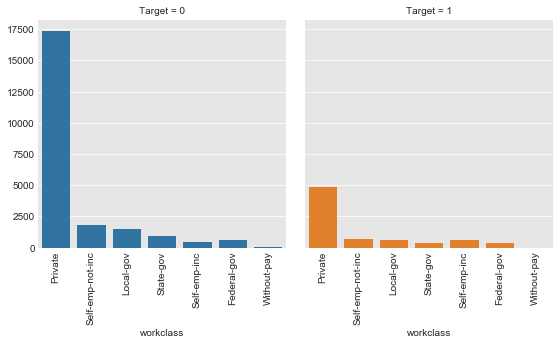

In [18]:
plotting_categorical(df,'workclass','Target',4)

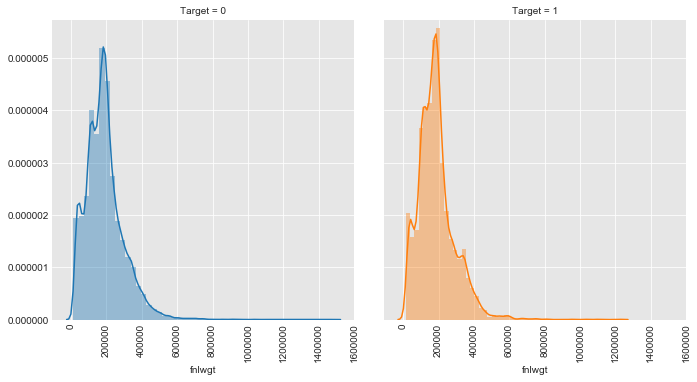

In [19]:
plotting_numerical(df,'fnlwgt','Target',5)

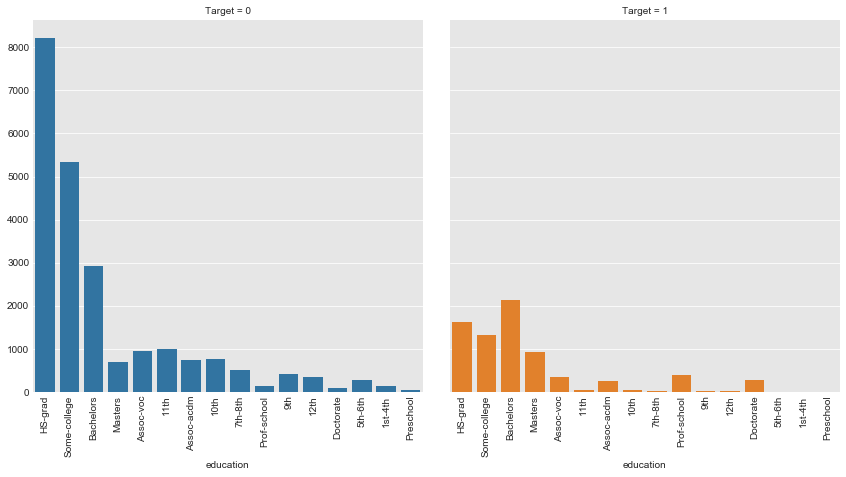

In [20]:
plotting_categorical(df,'education','Target',6)

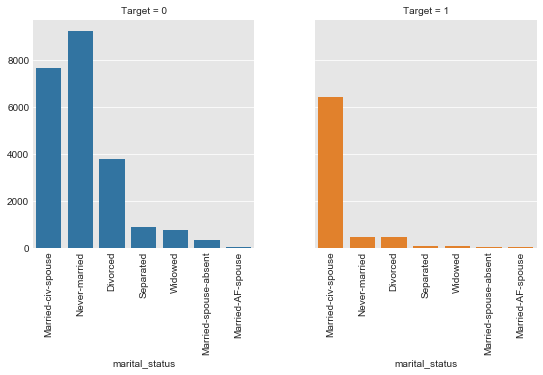

In [21]:
plotting_categorical(df,'marital_status','Target',4)

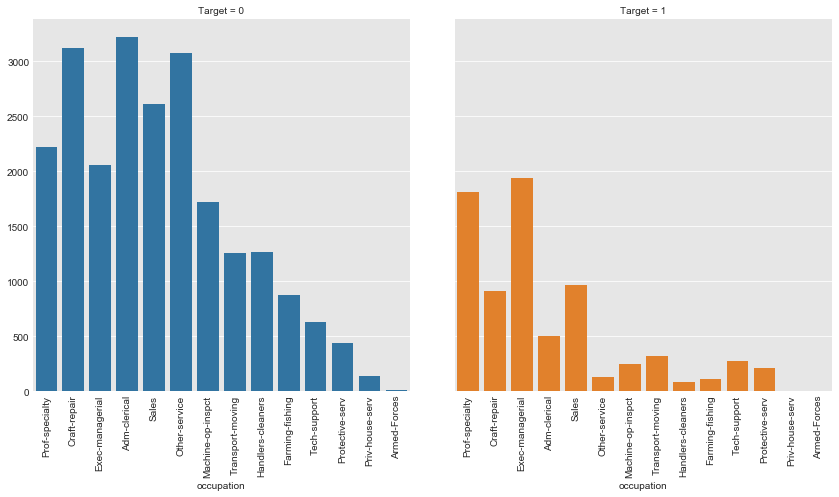

In [22]:
plotting_categorical(df,'occupation','Target',6)

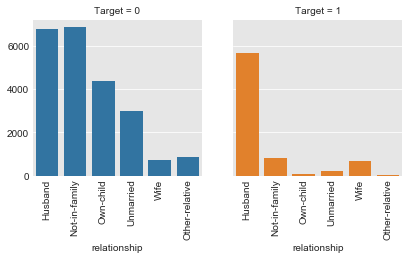

In [23]:
plotting_categorical(df,'relationship','Target',3)

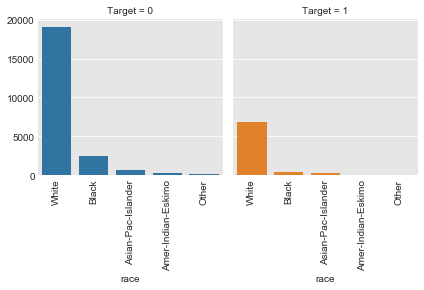

In [24]:
plotting_categorical(df,'race','Target',3)

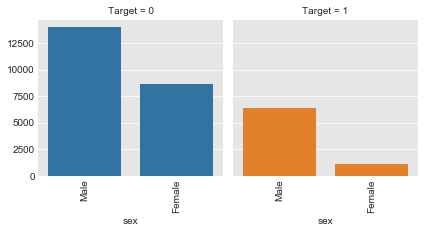

In [25]:
plotting_categorical(df,'sex','Target',3)

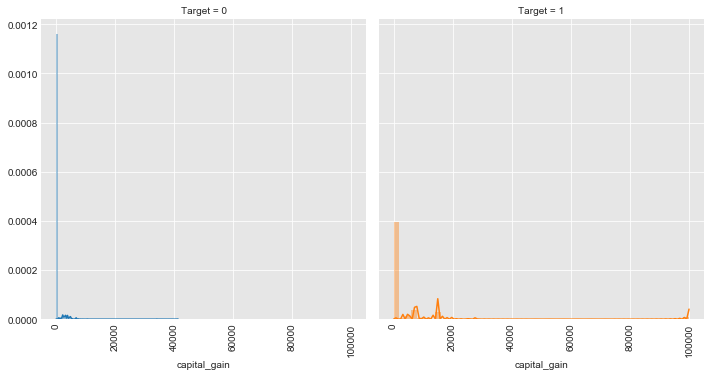

In [26]:
plotting_numerical(df,'capital_gain','Target',5)

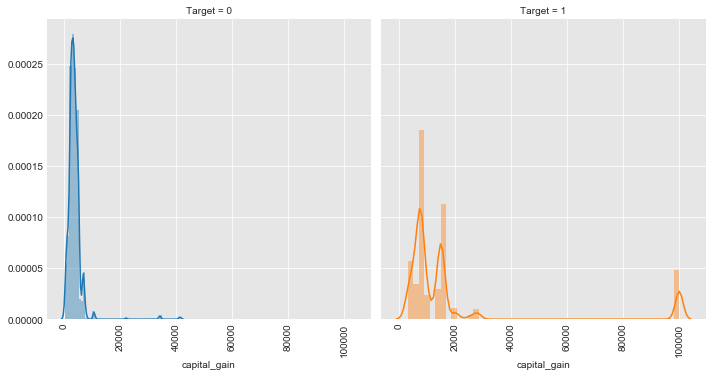

In [27]:
plotting_numerical(df[df['capital_gain']>0],'capital_gain','Target',5)

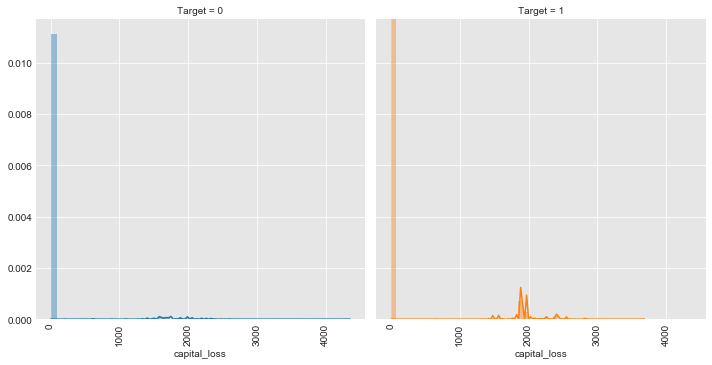

In [28]:
plotting_numerical(df,'capital_loss','Target',5)

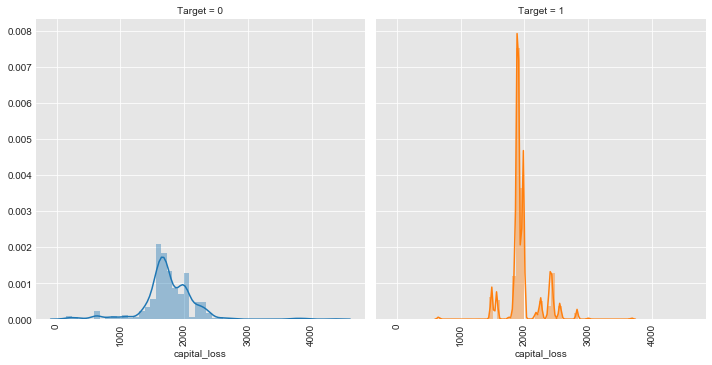

In [29]:
plotting_numerical(df[df['capital_loss']>0],'capital_loss','Target',5)

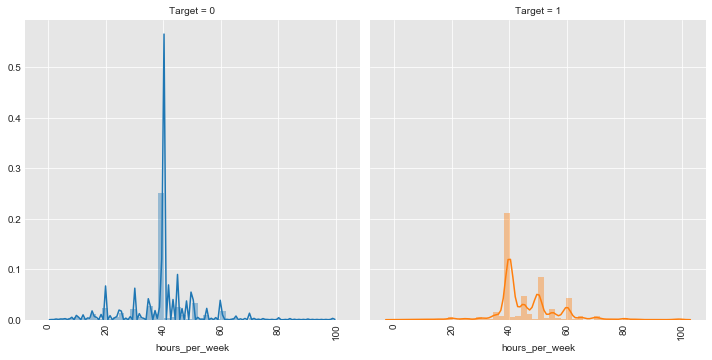

In [30]:
plotting_numerical(df,'hours_per_week','Target',5)

In [31]:
df_US = df[df["native_country"]=='United-States']

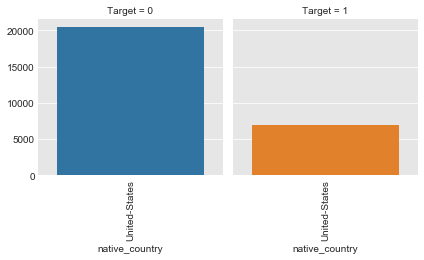

In [32]:
plotting_categorical(df_US,'native_country','Target',3)

In [33]:
df_NONUS = df[df["native_country"]!='United-States']

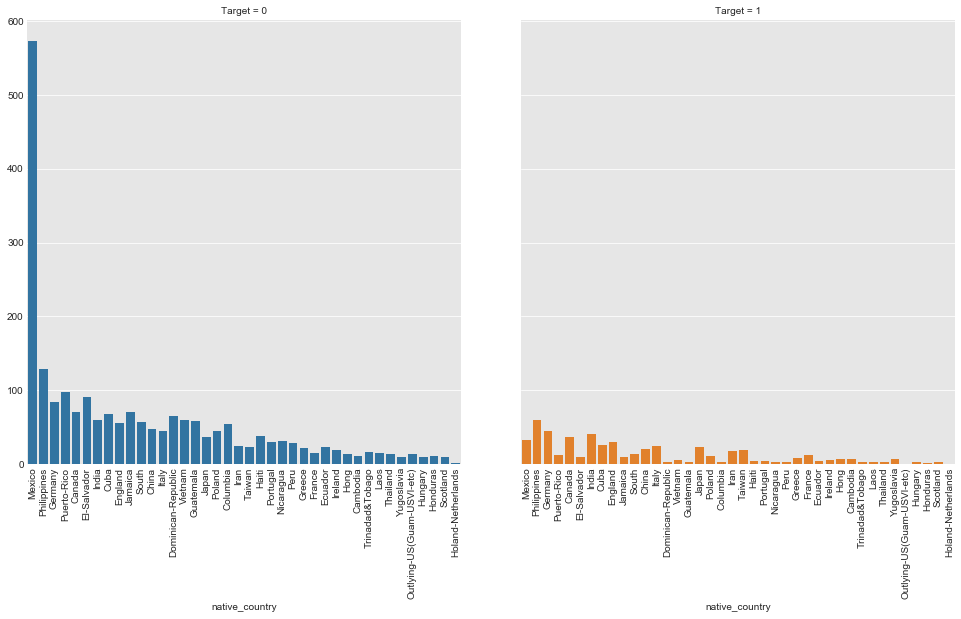

In [34]:
plotting_categorical(df_NONUS,'native_country','Target',7)

In [35]:
df_train = pd.read_csv('adult_train.csv',names=['age','workclass','fnlwgt','education','education_num',
                                          'marital_status','occupation','relationship','race','sex',
                                          'capital_gain','capital_loss','hours_per_week','native_country','Target'])
df_test = pd.read_csv('adult_test.csv',names=['age','workclass','fnlwgt','education','education_num',
                                          'marital_status','occupation','relationship','race','sex',
                                          'capital_gain','capital_loss','hours_per_week','native_country','Target'])

In [36]:
strip_df(df_train,df_train.select_dtypes(include=['object']).columns)
clensing(df_train)
dict_categorical(df_train,df_train.select_dtypes(include=['object']).columns)
categorical_numerical(df_train,df_train.select_dtypes(include=['object']).columns)
df_train.drop(labels='education',axis=1,inplace=True)

In [37]:
df_train.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Target
0,39,1,77516,13,1,1,1,1,1,2174,0,40,1,0
1,50,2,83311,13,2,2,2,1,1,0,0,13,1,0
2,38,3,215646,9,3,3,1,1,1,0,0,40,1,0
3,53,3,234721,7,2,3,2,2,1,0,0,40,1,0
4,28,3,338409,13,2,4,3,2,2,0,0,40,2,0


In [38]:
df_test['Target'].replace(to_replace=' <=50K.',value='<=50K',inplace=True)
df_test['Target'].replace(to_replace=' >50K.',value='>50K',inplace=True)
strip_df(df_test,df_test.select_dtypes(include=['object']).columns)
clensing(df_test)
categorical_numerical(df_test,df_test.select_dtypes(include=['object']).columns)
df_test.drop(labels='education',axis=1,inplace=True)

In [39]:
df_test.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Target
0,25,3,226802,7,1,9,4,2,1,0,0,40,1,0
1,38,3,89814,9,2,8,2,1,1,0,0,50,1,0
2,28,5,336951,12,2,12,2,1,1,0,0,40,1,1
3,44,3,160323,10,2,9,2,2,1,7688,0,40,1,1
5,34,3,198693,6,1,5,1,1,1,0,0,30,1,0


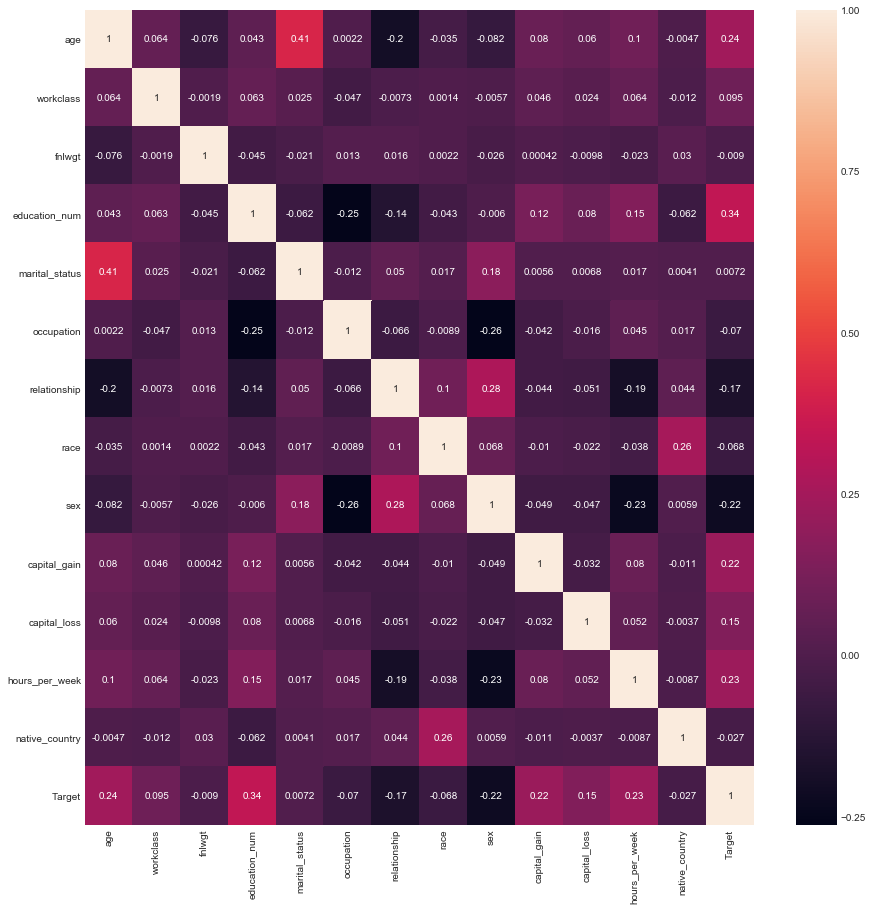

In [40]:
fig ,ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df_train.corr(),annot=True)

In [52]:
X_train =df_train.iloc[:,:-1].drop(labels=['marital_status','native_country'],axis=1)
y_train = df_train.iloc[:,-1]
model = sm.Logit(y_train,X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.423559
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                30139
Model:                          Logit   Df Residuals:                    30128
Method:                           MLE   Df Model:                           10
Date:                Mon, 10 Sep 2018   Pseudo R-squ.:                  0.2454
Time:                        23:32:34   Log-Likelihood:                -12766.
converged:                       True   LL-Null:                       -16917.
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0204      0.001     17.738      0.000       0.018       0.023
workclass         -0.0393      0.015     -2.589      0.010      -0.069      -0.010
fnlwgt         -1.036e-06    1.5e-07     -6.918      0.000   -1.33e-06   -7.43e-07
education_num      0.1702      0.006     28.684      0.000       0.159       0.182
occupation        -0.1042      0.005    -22.985      0.000      -0.113      -0.095
relationship      -0.2146      0.014    -15.824      0.000      -0.241      -0.188
race              -0.5064      0.034    -14.740      0.000      -0.574      -0.439
sex               -1.8439      0.042    -43.878      0.000      -1.926      -1.762
capital_gain       0.0003   9.88e-06     32.821      0.000       0.000       0.000
capital_loss       0.0007   3.33e-05     20.381      0.000       0.001       0.001
hours_per_week     0.0073      0.001      5.859      0.000       0.005       0.010
==================================================================================
"""

In [53]:
X_test =df_test.iloc[:,:-1].drop(labels=['marital_status','native_country'],axis=1)
y_test = df_test.iloc[:,-1]

In [54]:
regression = LogisticRegression()
model = regression.fit(X_train,y_train)

In [55]:
predict = model.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
cm = confusion_matrix(y_test,predict)
cr = classification_report(y_test,predict)

In [58]:
cm

array([[10947,   408],
       [ 2711,   989]], dtype=int64)

In [59]:
print(cr)

             precision    recall  f1-score   support

          0       0.80      0.96      0.88     11355
          1       0.71      0.27      0.39      3700

avg / total       0.78      0.79      0.76     15055



In [49]:
accuracies = cross_val_score(model,X_train,y_train,cv=10)

In [50]:
accuracies

array([0.79004975, 0.7920398 , 0.7854063 , 0.78964831, 0.78633046,
       0.80159257, 0.78327249, 0.79522071, 0.79090607, 0.79986724])

In [51]:
accuracies.mean()

0.7914333699621009